<a href="https://colab.research.google.com/github/Ash-git-create/Data_Analytics_1_WiSe2024/blob/main/Exercise_13_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Analysis

In [17]:
#Loading the dataset

import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data.rename(columns={'Passengers': 'Passengers'}, inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Plotting the loaded dataset to check the initial trends

<Figure size 1000x600 with 0 Axes>

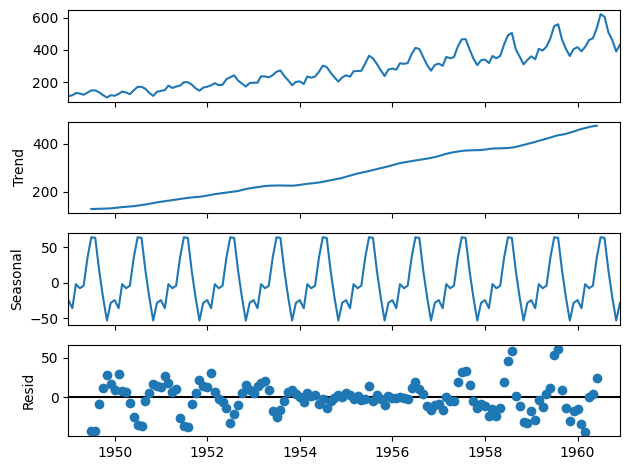

In [18]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(10, 6))
result = seasonal_decompose(data, model='additive')
result.plot()
plt.show()

 Simple Moving Average (SMA)

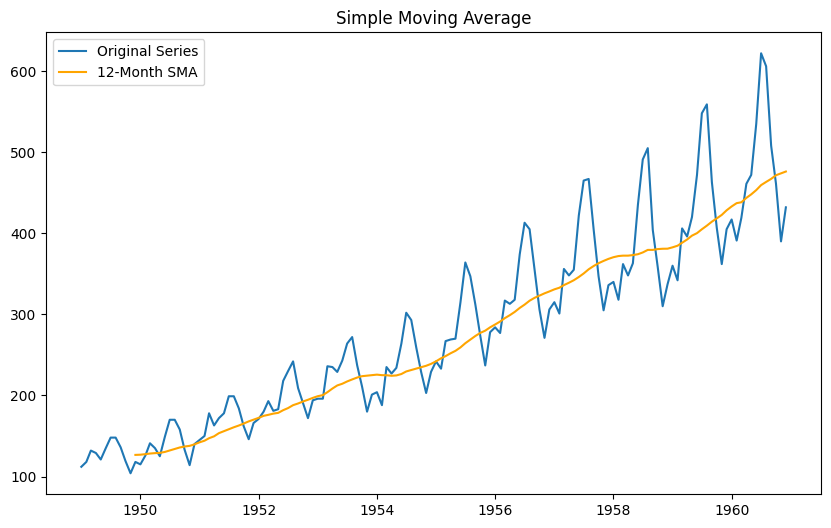

In [19]:
data['SMA_12'] = data['Passengers'].rolling(window=12).mean()
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Original Series')
plt.plot(data['SMA_12'], label='12-Month SMA', color='orange')
plt.title('Simple Moving Average')
plt.legend()
plt.show()

Weighted Moving Average (WMA)

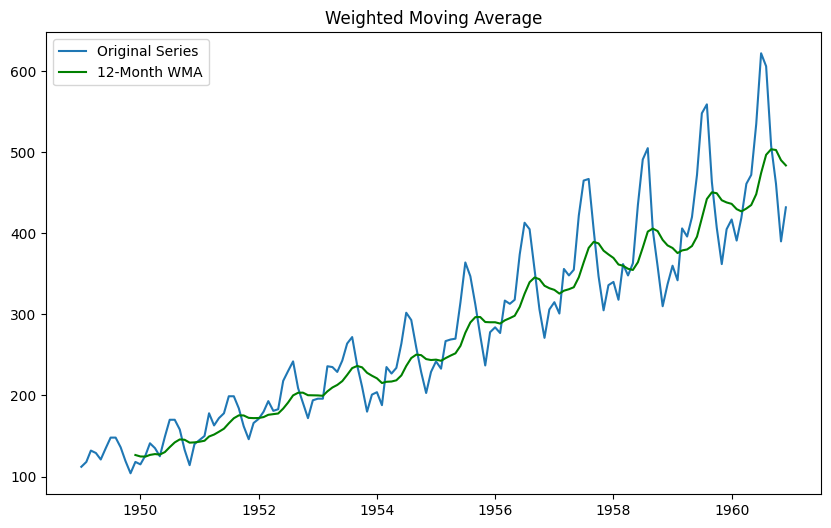

In [20]:
import numpy as np

def weighted_moving_average(series, window):
    weights = np.arange(1, window + 1)
    return series.rolling(window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

data['WMA_12'] = weighted_moving_average(data['Passengers'], 12)
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Original Series')
plt.plot(data['WMA_12'], label='12-Month WMA', color='green')
plt.title('Weighted Moving Average')
plt.legend()
plt.show()

Exponential Smoothing - Single, Double, Triple

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-21-1ab713791daa>:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(data['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


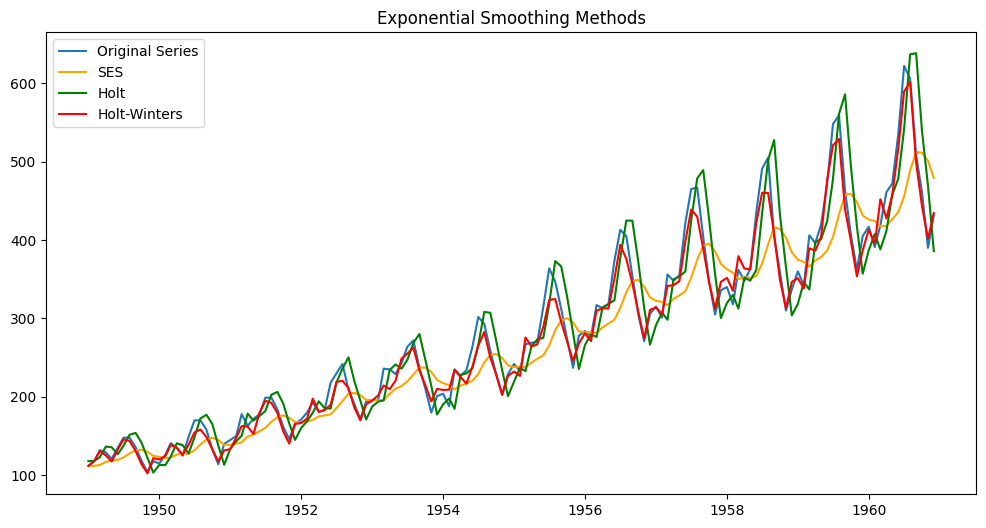

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Single Exponential Smoothing
ses_model = SimpleExpSmoothing(data['Passengers']).fit(smoothing_level=0.2, optimized=False)
data['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing
holt_model = Holt(data['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
data['Holt'] = holt_model.fittedvalues

# Triple Exponential Smoothing
hw_model = ExponentialSmoothing(data['Passengers'], seasonal='add', seasonal_periods=12).fit()
data['Holt_Winters'] = hw_model.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Original Series')
plt.plot(data['SES'], label='SES', color='orange')
plt.plot(data['Holt'], label='Holt', color='green')
plt.plot(data['Holt_Winters'], label='Holt-Winters', color='red')
plt.title('Exponential Smoothing Methods')
plt.legend()
plt.show()

ARIMA Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


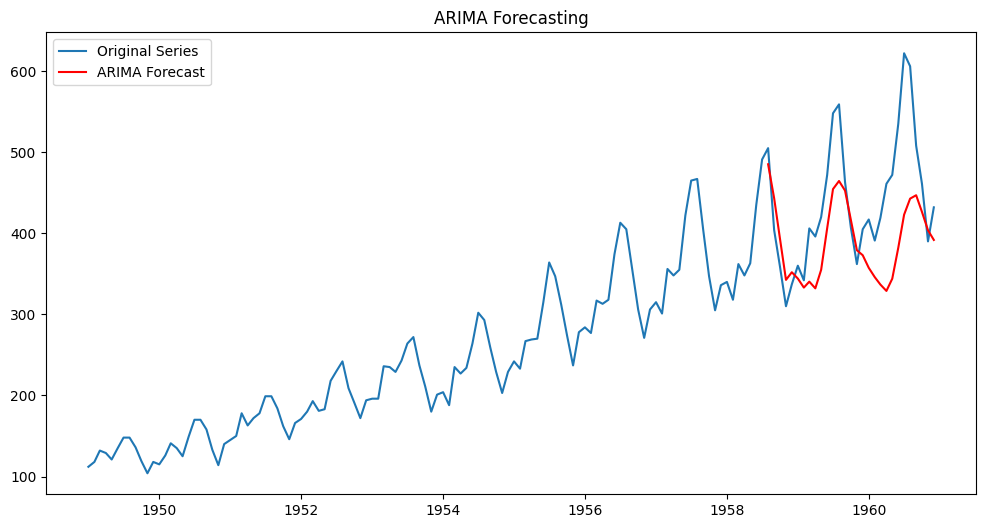

In [22]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(data) * 0.8)
train, test = data['Passengers'][:train_size], data['Passengers'][train_size:]

arima_model = ARIMA(train, order=(10, 1, 0)).fit()
arima_forecast = arima_model.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Original Series')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

SARIMA Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


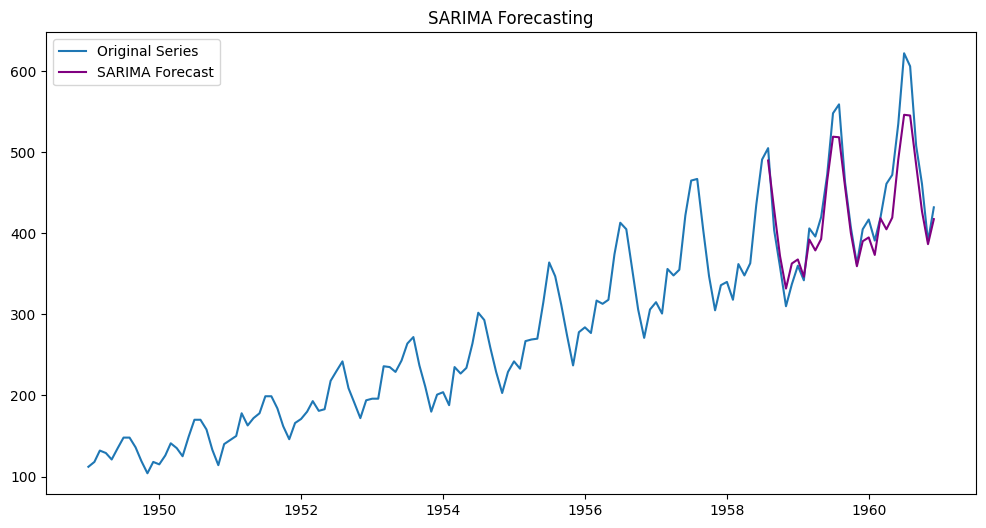

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Original Series')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='purple')
plt.title('SARIMA Forecasting')
plt.legend()
plt.show()

Evaluation

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

arima_mae = mean_absolute_error(test, arima_forecast)
sarima_mae = mean_absolute_error(test, sarima_forecast)

arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))

print(f"ARIMA MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")
print(f"SARIMA MAE: {sarima_mae:.2f}, RMSE: {sarima_rmse:.2f}")

if sarima_rmse < arima_rmse:
    print("SARIMA outperforms ARIMA.")
else:
    print("ARIMA outperforms SARIMA.")

ARIMA MAE: 61.91, RMSE: 79.54
SARIMA MAE: 23.55, RMSE: 30.14
SARIMA outperforms ARIMA.


MAE Comparison:
SARIMA's MAE (23.55) is much lower than ARIMA's MAE (61.91), indicating that SARIMA's predictions are closer to the actual values on average.

RMSE Comparison:
SARIMA's RMSE (30.14) is significantly lower than ARIMA's RMSE (79.54), suggesting that SARIMA handles larger errors better and provides more reliable forecasts.

Conclusion:
SARIMA outperforms ARIMA in both metrics (MAE and RMSE) for this dataset of airline passengers
